This  shows how `NumPy` can make data analysis much faster by replacing slow Python loops. A fictional company, **EnviroTech Dynamics**, which processes over a million sensor readings daily but struggles with slow code.

To demonstrate NumPy’s power,  a simple project using fake sensor data has been created:
-Temperature readings
- Pressure readings
- Status codes (0 = OK, 1 = Warning, 2 = Critical, 3 = Faulty)

The goal is to show beginners how NumPy handles large datasets quickly and efficiently, making it perfect for real-world data tasks.

- Performance and efficiency benchmark
- Foundational statistical baseline
- Critical anomaly detection and
- Data cleaning and imputation

By the end of this article, you should be able to get a full grasp of NumPy and its usefulness in data analysis.

In [2]:
# REQUIRED LIBRARIES
import numpy as np
import matplotlib.pyplot as plt


#### Objective 1: Performance and Efficiency Benchmark

In [3]:
# setting size of data
temp_num_readings = 1_000_000
# print(temp_num_readings)

# Generate the Temperature array (1 million random floating-point numbers)
np.random.seed(42)  #np.random.seed() locks or fixes the randomness in NumPy so you always get the same random numbers every time you run the code.
mean_temp = 45.0
std_dev_temp = 12.0
temp_data = np.random.normal(loc=mean_temp, scale=std_dev_temp, size=temp_num_readings)

print(f"Data Array Size: {temp_data.size} elements")
print(f"First 5 Temperatures: {temp_data[:5]}")

Data Array Size: 1000000 elements
First 5 Temperatures: [50.96056984 43.34082839 52.77226246 63.27635828 42.1901595 ]


- To calculate the average of all these elements.
- **NP.MEAN()** will be used.
- Using built-in mean function in NumPy so that the entire operation (average in this case) will be performed on the entire array at once. This is possible because of `NumPy Vectorization.`

In [4]:
# average function initialized 
def calculate_mean_data(data):
    return np.mean(data)

# implementing function
temp_data_mean = calculate_mean_data(temp_data)
print(f"Mean (NumPy Method):{temp_data_mean:.4f}")      #here {:.4f} means 4 decimal places. One can set it on their choice.

Mean (NumPy Method):44.9808


In [5]:
# Calculating how much time it takes for NumPy Vectorization

print("— — Timing the NumPy Vectorization — -")

%timeit -n 10 -r 5 calculate_mean_data(temp_data)       # 1 ms = 1000 μs    #convert µs → ms by dividing by 1000


— — Timing the NumPy Vectorization — -
294 μs ± 67.8 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)


#### Objective 2: Foundational Statistical Baseline
NumPy offers the ability to perform basic to advanced statistics.
A good overview of what’s going on in your dataset. Some of them listed below: 

- **np.mean()** — to calculate the average.
- **np.median** — the middle value of the data
- **np.std()** — shows how spread out your numbers are from the average
- **np.percentile()** — tells you the value below which a certain percentage of your data falls.

 **After building an efficient NumPy-based system for processing large datasets, Next Step:**
- Pressure data will be generated just like the temperature data.
- This helps demonstrate NumPy’s ability to handle multiple large arrays quickly.
- Pressure readings also provide important system health insights for the client.
- Temperature and pressure are often linked — changes in one can affect the other.
- Calculating baselines for both helps identify abnormal patterns or drifting behavior.

In [6]:
np.random.seed(43)
pressure_data = np.random.uniform(low=100.0, high=500.0, size=1_000_000)

print("Data Arrays Ready")
print("Pressure Data:\n",pressure_data)

Data Arrays Ready
Pressure Data:
 [146.02182656 343.62661571 153.35638567 ... 455.21937053 303.91397541
 293.53768099]


**CALCULATING TEMPERATURE STATISTICS**

In [7]:
print("\n- - - - Temperature Stats - - - - ")

#1. calculating Mean and Median of temperature
temp_mean = np.mean(temp_data)
temp_median = np.median(temp_data)

#2. calculating Standard Deviation
temp_std = np.std(temp_data)

#3. calculating percintile(Defining the 90% Normal Range). (A percentile tells you the value below which a certain percentage of data falls.)
temp_p5 = np.percentile(temp_data, 5)   #5th Percentile.
temp_p95 = np.percentile(temp_data, 95)     #95th Percentile

#Printing Results:
print(f"Temperature Mean(Average):{temp_mean:.2f}°C")
print(f"Temperature Median(Middle):{temp_median:.2f}°C")
print(f"Standard Deviation(Spread): {temp_std:.2f}°C")
print(f"90% Normal Range: {temp_p5:.2f}°C to {temp_p95:.2f}°C")


- - - - Temperature Stats - - - - 
Temperature Mean(Average):44.98°C
Temperature Median(Middle):44.99°C
Standard Deviation(Spread): 12.00°C
90% Normal Range: 25.24°C to 64.71°C


- `The Mean (Average) 44.98°C` basically gives us a central point around which most readings are expected to fall. 
- `The Median(Middle) 44.99C` is nearly identical, meaning the dataset is well-balanced without extreme outliers affecting the average.
- `The standard deviation 12°C` indicating that temperatures fluctuate quite widely rather than remaining stable.
- `90% of all temperature readings fall between 25°C and 65°C.` This range represents what can be considered the “normal operating window.”

**CALCULATING PRESSURE STATISTICS**

- To improve our codebase storing all the calculations performed in a dictionary called *pressure stats*, and simply looping over the key-value pairs.

In [8]:
print("\n- - - - Pressure Stats - - - - ")

#Same Calculation for Pressure
pressure_stats = { 
"Mean": np.mean(pressure_data),
"Median": np.median(pressure_data),
"Standard Deviation":np.std(pressure_data),
"5th %tile": np.percentile(pressure_data, 5),
"95th %tile":np.percentile(pressure_data, 95)}

for label, value in pressure_stats.items():
    print(f"{label:<12}: {value:.2f} kPa")


- - - - Pressure Stats - - - - 
Mean        : 300.09 kPa
Median      : 300.04 kPa
Standard Deviation: 115.47 kPa
5th %tile   : 120.11 kPa
95th %tile  : 480.09 kPa


- Pressure readings average around `300 kilopascals`
- The median(Middle Value) is almost the same. 
- The standard deviation is about `115 kPa`. means there’s a lot of variation between readings. In other words, some readings are much higher or lower than the typical 300 kPa level.
- The percentiles, `90% of our readings fall between 120 and 480 kPa.` That’s a wide range,

This Suggests that pressure conditions are not stable — possibly fluctuating between low and high states during operation. So while the average looks fine, the variability could point to inconsistent performance or environmental factors affecting the system.”

#### Objective 3: Critical Anomaly Identification

- NumPy makes anomaly detection fast and efficient, especially with very large datasets.
- The client, EnviroTech Dynamics, provides system status codes ranging from 0–3. 
            `0 → Normal. 1 → Warning. 2 → Critical. 3 → Sensor Error`
- Objective is to identify machines that are both critically flagged and overheating.
- Manually checking or using loops would be slow and inefficient.
- Boolean Indexing (masking) allows instant filtering by applying logical conditions directly to arrays.
- This lets us analyze millions of readings within milliseconds, with no loops needed.

Earlier, we generated our temperature and pressure data. Let’s do the same for the status codes.

- `np.random.choice()` randomly selects values from the list [0, 1, 2, 3].
- `size=len(temp_data)` ensures the number of status codes matches the number of temperature readings.
- `p=[0.85, 0.10, 0.03, 0.02]` defines the probability distribution: 0 → Normal (85% of the time). 1 → Warning (10%). 2 → Critical (3%). 3 → Sensor Error (2%)

In [9]:
#Reusing 'temperature data' from earlier  
# np.seed for reproducibility
np.random.seed(42)

status_codes = np.random.choice(a=[0,1,2,3], size=len(temp_data), p=[0.85, 0.10, 0.03, 0.02])
print(status_codes[:5])

[0 2 0 0 0]


Next, we’ll need some sort of threshold or anomaly criteria. 
- In most scenarios, anything above `mean + 3 × standard deviation` is considered a severe outlier, the kind of reading you don’t want in your system. 
- In Statistics, *`Outlier` are data points that are significantly different from other observations in a dataset, lying an abnormal distance from the rest of the data* 

In [10]:
temp_mean = np.mean(temp_data)
temp_std = np.std(temp_data)

severity_threshold = temp_mean + (3 * temp_std)
print(f"Severe Outlier Threshold: {severity_threshold:.2f}Celcius")

Severe Outlier Threshold: 80.99Celcius


*Next: create two filters (masks):*
1. To isolate data that meets our conditions. One for readings where the system status is Critical (code 2).
2. for readings where the temperature exceeds the threshold.

In [11]:
#Mask1 - Readings where system status == critical
critical_status_mask = (status_codes == 2)

#Mask2 - Readings where temperature exceeds threshold
high_temp_outlier_mask = (temp_data > severity_threshold)

#Printing
print(f"Critical status readings: {critical_status_mask.sum()}")
print(f"High-Temperature Outliers: {high_temp_outlier_mask.sum()}")

Critical status readings: 30178
High-Temperature Outliers: 1333


- Combining both Anomalies.
- Critical and too hot both readings required.
- AND function will be used to filter on multiple conditions.

In [12]:
# Combining both conditions
critical_anomaly_mask = critical_status_mask & high_temp_outlier_mask

# Extract actual temperatures of those anomalies
extracting_anomalies = temp_data[critical_status_mask]
anomaly_count = critical_anomaly_mask.sum()

print("\n — — Final Results — -")
print(f"Total Critical Anomalies: {anomaly_count}")
print(f"Sample Temperatures: {extracting_anomalies[:5]}")


 — — Final Results — -
Total Critical Anomalies: 34
Sample Temperatures: [43.34082839 39.41124296 54.87053895 48.88900763 30.2296282 ]


**OBJECTIVE 3 FINAL INSIGHTS**

- After analyzing `one million temperature readings`, the system detected `34 critical anomalies`.
- These anomalies were identified where:
    1. The machine reported a ‘`critical status’`, and.
    2. The temperature `exceeded the high-temperature threshold`.
- The first few critical readings ranged between `81°C and 86°C`, far above the normal average of `~45°C.`
- This indicates `possible overheating` or `sensor malfunction` in a small set of sensors.
- While `99.99% of the data is stable`, these `34 readings` highlight specific points that should be `investigated or prioritized for maintenance`.

**Visualise with Matplotlib: Overall Temperature Distribution. Shows the full dataset and highlights the severity threshold.**

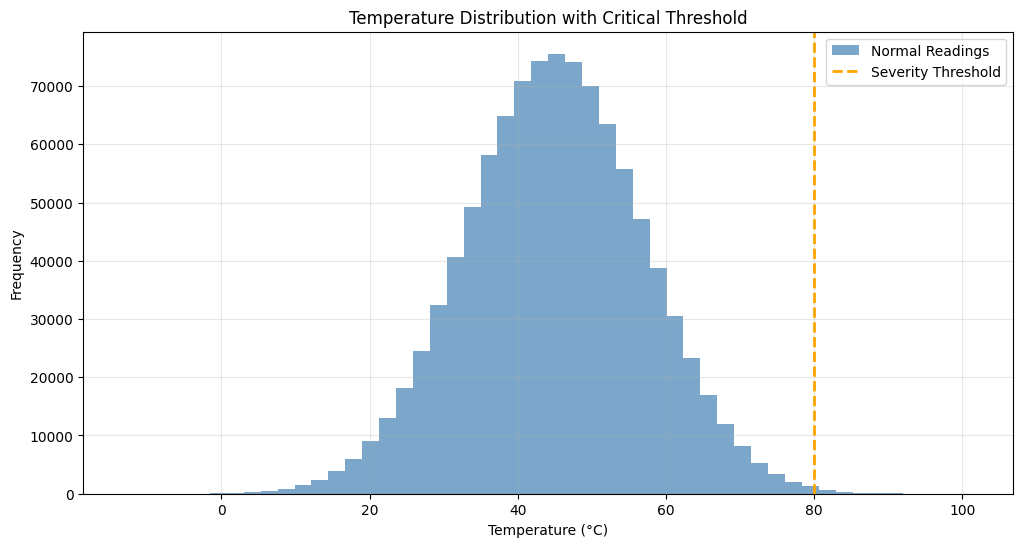

In [13]:
plt.figure(figsize=(12,6))

#histogram of all readings
plt.hist(temp_data, bins=50, alpha=0.7, label="Normal Readings", color="steelblue")

# Severity line (example threshold: 80°C)
plt.axvline(80, color='orange', linestyle='--', linewidth=2, label="Severity Threshold")

#Headings and labels
plt.title("Temperature Distribution with Critical Threshold")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Visualise with Matplotlib: Critical Anomalies. Only shows temperature readings where machine status == critical AND temp > threshold.**

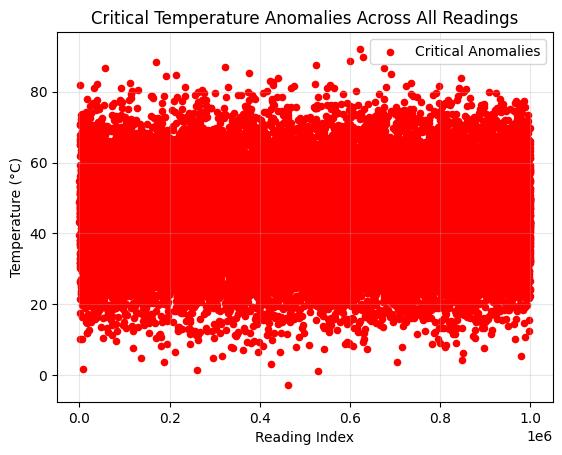

In [14]:
# Scatter plot of only critical anomalies
plt.scatter(np.where(critical_status_mask)[0],     # x positions (indices)
    temp_data[critical_status_mask],       # actual temperatures
    color="red",
    s=20,
    label="Critical Anomalies"
)

plt.title("Critical Temperature Anomalies Across All Readings")
plt.xlabel("Reading Index")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#### OBJECTIVE 4: Data Cleaning and Imputation
- Learn what is Data Cleaning.
- Garbage in, Garbage out.

- Data cleaning is a crucial step in data analysis to remove or correct values that don’t make sense.
- NumPy (and Pandas) provide efficient tools to clean, filter, and fix large datasets.
- In our example, status_codes includes entries with value 3, representing Faulty/Missing temperature readings.
- Using these faulty readings directly would skew the final analysis and produce misleading insights.
- The solution is to replace faulty values with an estimated, reliable substitute.
- The median of the valid temperature readings is a strong choice for replacement because:
    1. It is not influenced by extreme values.
    2. It preserves the overall distribution more accurately than the mean.
- This ensures the dataset remains consistent, accurate, and ready for analysis without distortions.

In [15]:
# Identify the mask for ‘Valid’ data (where status_codes is NOT 3 — Faulty/Missing).
valid_data_mask = (status_codes != 3)

# Calculate the median temperature ONLY for the Valid data points. This is our imputation value.
valid_median_temp = np.median(temp_data[valid_data_mask])
print(f"Median of all valid readings: {valid_median_temp:.2f}°C")

Median of all valid readings: 44.99°C


**NP.WHERE()** will be utilized to perform conditional replacement.
- Condition Is the status code 3 (Faulty/Missing)? Is the reading faulty?
- Value if True: Use our calculated valid_median_temp. VALUE_IF_TRUE: Replace with the calculated median.
- Value if False: Keep the original temperature reading.  VALUE_IF_FALSE: Keep the original temperature value.

In [16]:
# Implement the conditional replacement using np.where().
cleaned_temp_data = np.where(status_codes == 3, valid_median_temp, temp_data)

# Print the total number of replaced values.
imputed_count = (status_codes == 3).sum()
print(f"Total Faulty Readings imputed: {imputed_count}")

Total Faulty Readings imputed: 20102


- These missing readings likely influenced earlier analysis results.
- Fortunately, NumPy allowed us to replace all faulty values quickly and efficiently.

**Verify the fix by checking the median for both the original and cleaned data**

In [20]:
# Print the change in the overall mean or median to show the impact of the cleaning.

print(f"\nOriginal Median: {np.median(temp_data):.2f} Celcius")
print(f"Cleaned Median: {np.median(cleaned_temp_data):.2f} Celcius")



Original Median: 44.99 Celcius
Cleaned Median: 44.99 Celcius


- Even after cleaning more than 20,000 faulty records, the median temperature stayed consistent at 44.99°C.
- This stability shows that the dataset is statistically sound, balanced, and not heavily influenced by faulty entries.
- Out of 1,000,000 temperature readings, a total of 20,102 entries were identified as faulty (status_code = 3).
- Instead of deleting these values—which could distort dataset size and continuity—they were replaced with the median temperature (~45°C), a robust statistical choice unaffected by extreme values.
- The median remained unchanged at 44.99°C before and after cleaning, confirming that:
    1. the faulty readings did not skew the dataset, and
    2. the replacement process preserved the data’s natural distribution.

#### FINAL PROJECT WRAP UP
**This project set out to solve a major bottleneck for EnviroTech Dynamics: improving the speed and quality of their environmental data analysis workflow.**
**Thanks to the strengths of NumPy arrays, especially vectorization:**

**- We eliminated slow, loop-based processing.**
**- We enabled near-instant analysis of 1 million+ datapoints.**
**- We enabled near-instant analysis of 1 million+ datapoints.**
**- We simulated real-world sensor behavior (normal, noisy, and faulty data).**
**- We identified anomalies, trends, and statistical patterns using efficient array operations.**
**- We introduced data-cleaning techniques that restored dataset reliability without compromising structure.**

##### Final Verdict: This project demonstrates how NumPy transforms large-scale data handling—from raw sensor dumps to clean, analysable insights—making it a powerful foundation for any data-driven organization looking to scale efficiently.